In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Dataset\\engineered_merge_netflix_imdb.csv")

df.head()

,minutely,show_id,rating,director,duration,weighted_average_vote,total_votes,description,type,release_year,...,original_title,country,date_added,listed_in,title,season_duration,minute_duration,cast,year_added,seasonly
0,1,s2,TV-MA,Jorge Michel Grau,93 min,6.0,536,After a devastating earthquake hits Mexico Cit...,Movie,2016,...,7:19,Mexico,2016-12-23 00:00:00,"Dramas, International Movies",7:19,0,93,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",2016,0
1,1,s3,R,Gilbert Chan,78 min,4.6,802,"When an army recruit is found dead, his fellow...",Movie,2011,...,23:59,Singapore,2018-12-20 00:00:00,"Horror Movies, International Movies",23:59,0,78,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",2018,0
2,1,s4,PG-13,Shane Acker,80 min,7.1,131029,"In a postapocalyptic world, rag-doll robots hi...",Movie,2009,...,9,United States,2017-11-16 00:00:00,"Action & Adventure, Independent Movies, Sci-Fi...",9,0,80,"Elijah Wood, John C. Reilly, Jennifer Connelly...",2017,0
3,1,s5,PG-13,Robert Luketic,123 min,6.8,225698,A brilliant group of students become card-coun...,Movie,2008,...,21,United States,2020-01-01 00:00:00,Dramas,21,0,123,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",2020,0
4,1,s7,TV-MA,Yasir Al Yasiri,95 min,6.8,3646,"After an awful accident, a couple admitted to ...",Movie,2019,...,122,Egypt,2020-06-01 00:00:00,"Horror Movies, International Movies",122,0,95,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",2020,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1986 entries, 0 to 1985
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   minutely               1986 non-null   int64  
 1   show_id                1986 non-null   object 
 2   rating                 1986 non-null   object 
 3   director               1986 non-null   object 
 4   duration               1986 non-null   object 
 5   weighted_average_vote  1986 non-null   float64
 6   total_votes            1986 non-null   int64  
 7   description            1986 non-null   object 
 8   type                   1986 non-null   object 
 9   release_year           1986 non-null   int64  
 10  imdb_title_id          1986 non-null   object 
 11  month_added            1986 non-null   object 
 12  original_title         1986 non-null   object 
 13  country                1986 non-null   object 
 14  date_added             1986 non-null   object 
 15  list

In [4]:
drop_features = ['show_id', 'duration', 'description', 'imdb_title_id', 
                 'seasonly', 'season_duration', 'original_title', 'minutely', 
                 'type', 'minute_duration', 'year_added', 'month_added',
                 'date_added']

df = df.drop(columns=drop_features)

Dropped type, minutely, seasonly, season_duration because this dataset just have 1 type show that is Movie

In [5]:
df.head()

,rating,director,weighted_average_vote,total_votes,release_year,country,listed_in,title,cast
0,TV-MA,Jorge Michel Grau,6.0,536,2016,Mexico,"Dramas, International Movies",7:19,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ..."
1,R,Gilbert Chan,4.6,802,2011,Singapore,"Horror Movies, International Movies",23:59,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ..."
2,PG-13,Shane Acker,7.1,131029,2009,United States,"Action & Adventure, Independent Movies, Sci-Fi...",9,"Elijah Wood, John C. Reilly, Jennifer Connelly..."
3,PG-13,Robert Luketic,6.8,225698,2008,United States,Dramas,21,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar..."
4,TV-MA,Yasir Al Yasiri,6.8,3646,2019,Egypt,"Horror Movies, International Movies",122,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed..."


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1986 entries, 0 to 1985
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   rating                 1986 non-null   object 
 1   director               1986 non-null   object 
 2   weighted_average_vote  1986 non-null   float64
 3   total_votes            1986 non-null   int64  
 4   release_year           1986 non-null   int64  
 5   country                1986 non-null   object 
 6   listed_in              1986 non-null   object 
 7   title                  1986 non-null   object 
 8   cast                   1986 non-null   object 
dtypes: float64(1), int64(2), object(6)
memory usage: 139.8+ KB


In [7]:
def plot_bar_plot(data, x, y, p_x=10, p_y=10, title=None, x_lbl=None, y_lbl=None):
    if title == None:
        title = x
    elif x_lbl == None:
        x_lbl = x
    elif y_lbl == None:
        y_lbl = y
    
    fig = plt.subplots(figsize=(15,9))
    
    sns.barplot(data=data, x=x, y=y)
    
    plt.title(f"Disribution of {title}")
    plt.xlabel(x_lbl)
    plt.tick_params(axis='x', labelsize=p_x)
    plt.ylabel(y_lbl)
    plt.tick_params(axis='y', labelsize=p_y)
    
    return plt.show()

In [8]:
def plot_count_plot(data, x, title=None, p_x=10, x_lbl=None):
    if title == None:
        title = x
    elif x_lbl == None:
        x_lbl = x
    
    fig = plt.subplots(figsize=(15,9))
    
    sns.countplot(data=data, x=x)
    
    plt.title(f"Disribution of {title}")
    plt.xlabel(x_lbl)
    plt.tick_parmas(axis='x', labelsize=p_x)
    plt.ylabel('Counts')
    
    return plt.show()

## Plotting title base on countries

In [9]:
countries = []
for country in df['country']:
    if "," in country:
        countries.extend(country.split(','))
    else:
        countries.append(country)
        
countries = pd.Series(countries)
countries = countries.apply(lambda x: x.strip())
countries = list(countries)

In [10]:
country, counts = np.unique(countries, return_counts=True)

countries = pd.DataFrame(data={'country':country,
                               'counts':counts})

countries = countries.sort_values('counts', ascending=False)[:10]

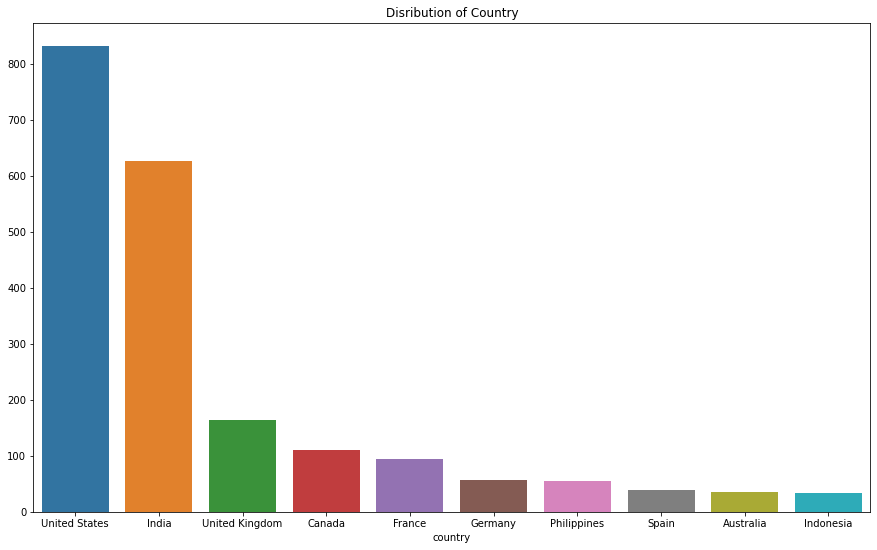

In [11]:
plot_bar_plot(countries, 'country', 'counts', title='Country')

The most common country is United States, India and United Kindom

In [12]:
usa_index = []
for index in df.index:
    if 'United States' in df.iloc[index]['country']:
        usa_index.append(index)
        
uk_index = []
for index in df.index:
    if 'United Kingdom' in df.iloc[index]['country']:
        uk_index.append(index)
        
ind_index = []
for index in df.index:
    if 'India' in df.iloc[index]['country']:
        ind_index.append(index)

In [13]:
df_usa = df.iloc[usa_index].sort_values('weighted_average_vote', ascending=False)[:10]
df_ind = df.iloc[ind_index].sort_values('weighted_average_vote', ascending=False)[:10]
df_uk = df.iloc[uk_index].sort_values('weighted_average_vote', ascending=False)[:10]

df_usa = df_usa[['title', 'weighted_average_vote']]
df_ind = df_ind[['title', 'weighted_average_vote']]
df_uk = df_uk[['title', 'weighted_average_vote']]

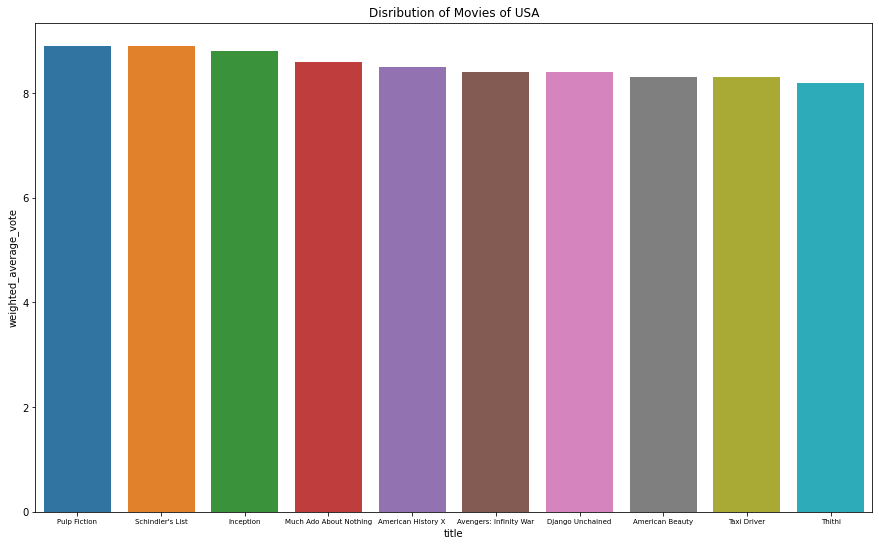

In [14]:
plot_bar_plot(df_usa, 'title', 'weighted_average_vote', p_x=7, title="Movies of USA", y_lbl='weighted_average_vote')

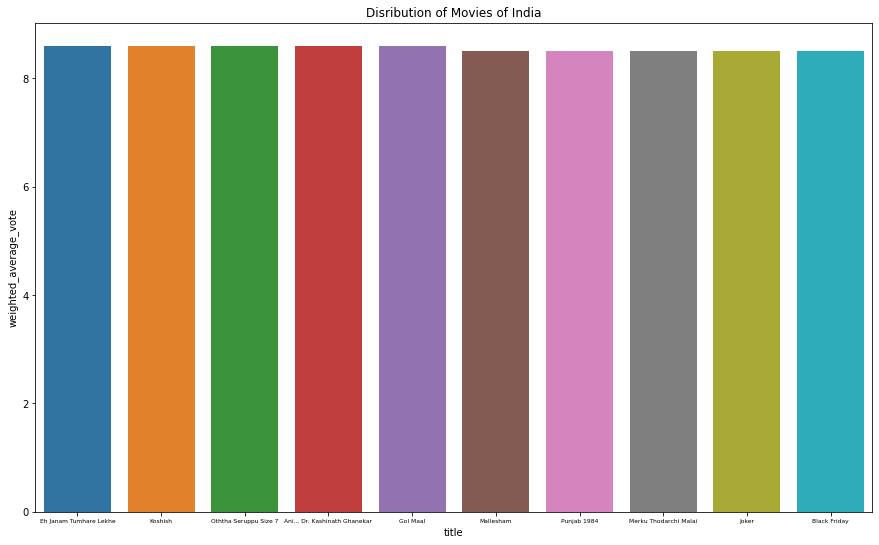

In [15]:
plot_bar_plot(df_ind, 'title', 'weighted_average_vote', p_x=6, title="Movies of India", 
              x_lbl='title', y_lbl='weighted_average_vote')

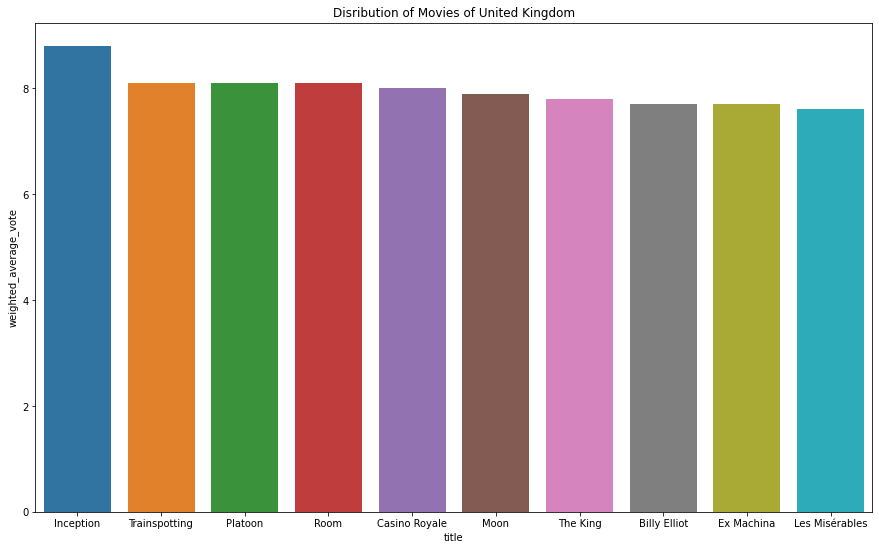

In [16]:
plot_bar_plot(df_uk, 'title', 'weighted_average_vote', title="Movies of United Kingdom", x_lbl='title', y_lbl='weighted_average_vote')

## Plotting base on Director

In [17]:
df['director']

0       Jorge Michel Grau
1            Gilbert Chan
2             Shane Acker
3          Robert Luketic
4         Yasir Al Yasiri
              ...        
1981        David Fincher
1982         Shlok Sharma
1983         Peter Hewitt
1984          Josef Fares
1985          Mozez Singh
Name: director, Length: 1986, dtype: object

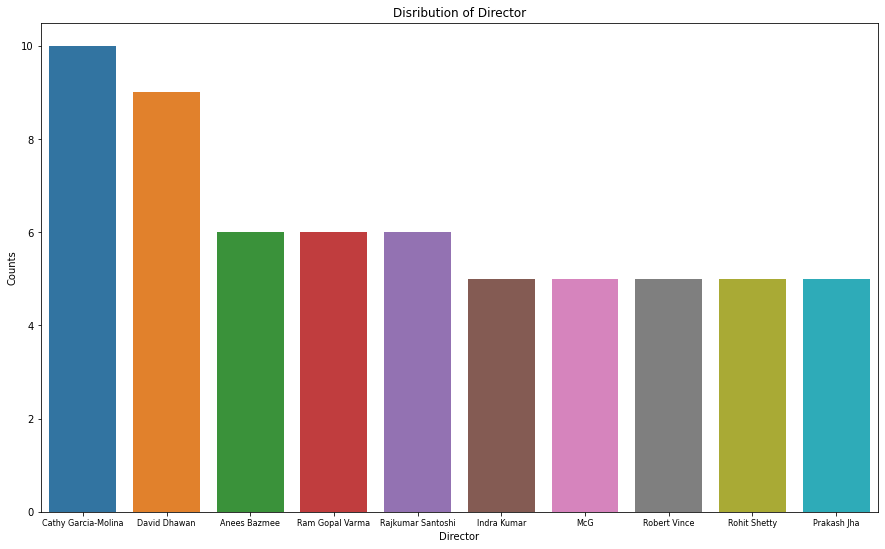

In [18]:
director = df['director'].value_counts().index[:10]
counts = df['director'].value_counts()[:10]

plot_bar_plot(df, director, counts, x_lbl='Director', y_lbl='Counts', p_x=8, title="Director")

The most common directors are Cathy Garcia-Molina, David Dhawan, Rajkumar Santoshi

In [19]:
cgm_title = df[df['director'] == 'Cathy Garcia-Molina']['title']
cgm_wav = df[df['director'] == 'Cathy Garcia-Molina']['weighted_average_vote']
cgm_df = pd.DataFrame(data={'title':cgm_title,
                            'weighted_average_vote':cgm_wav}).sort_values('weighted_average_vote', ascending=False)[:10]

dd_title = df[df['director'] == 'David Dhawan']['title']
dd_wav = df[df['director'] == 'David Dhawan']['weighted_average_vote']
dd_df = pd.DataFrame(data={'title':dd_title,
                            'weighted_average_vote':dd_wav}).sort_values('weighted_average_vote', ascending=False)[:10]

rs_title = df[df['director'] == 'Rajkumar Santoshi']['title']
rs_wav = df[df['director'] == 'Rajkumar Santoshi']['weighted_average_vote']
rs_df = pd.DataFrame(data={'title':rs_title,
                            'weighted_average_vote':rs_wav}).sort_values('weighted_average_vote', ascending=False)[:10]

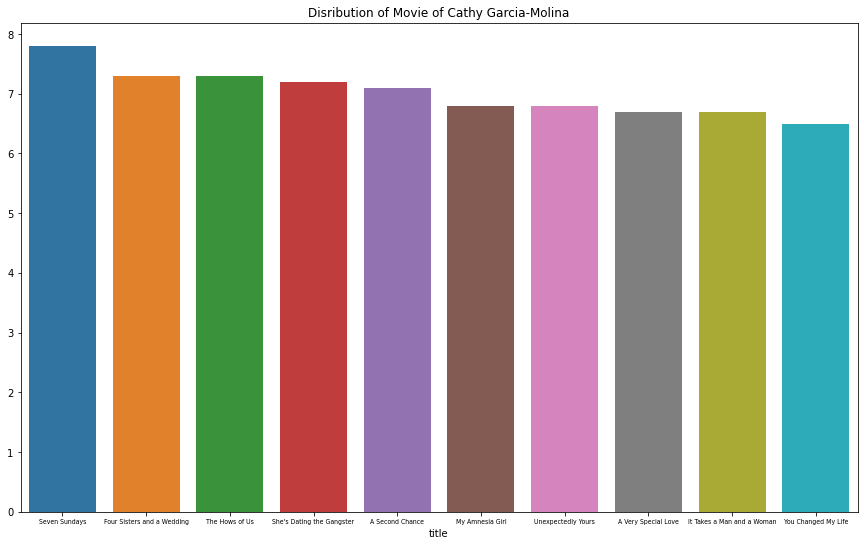

In [20]:
plot_bar_plot(cgm_df, 'title', 'weighted_average_vote', title='Movie of Cathy Garcia-Molina', p_x=6.2)

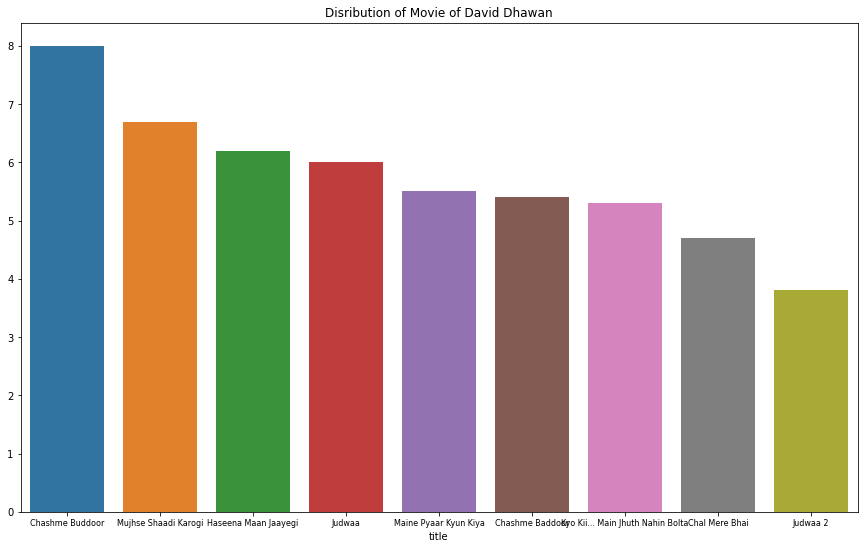

In [21]:
plot_bar_plot(dd_df, 'title', 'weighted_average_vote', title='Movie of David Dhawan', p_x=8)

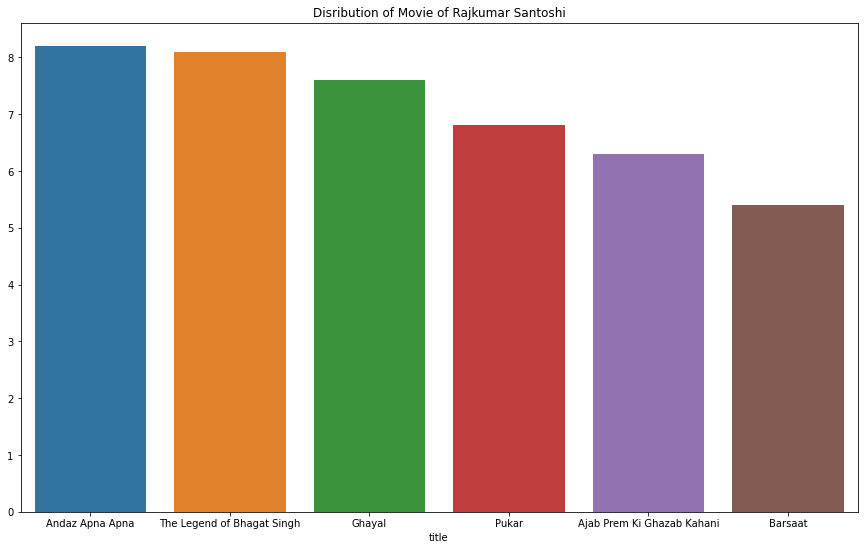

In [22]:
plot_bar_plot(rs_df, 'title', 'weighted_average_vote', title='Movie of Rajkumar Santoshi')

## Plotting base on cast

In [23]:
casts = []
for cast in df['cast']:
    casts.extend(cast.split(','))
    
casts = pd.Series(casts)
casts = casts.apply(lambda x: x.strip())
casts = list(casts)

In [24]:
cast, counts = np.unique(casts, return_counts=True)

cast_df = pd.DataFrame(data={'casts':cast,
                             'counts':counts}).sort_values('counts', ascending=False)[:10]

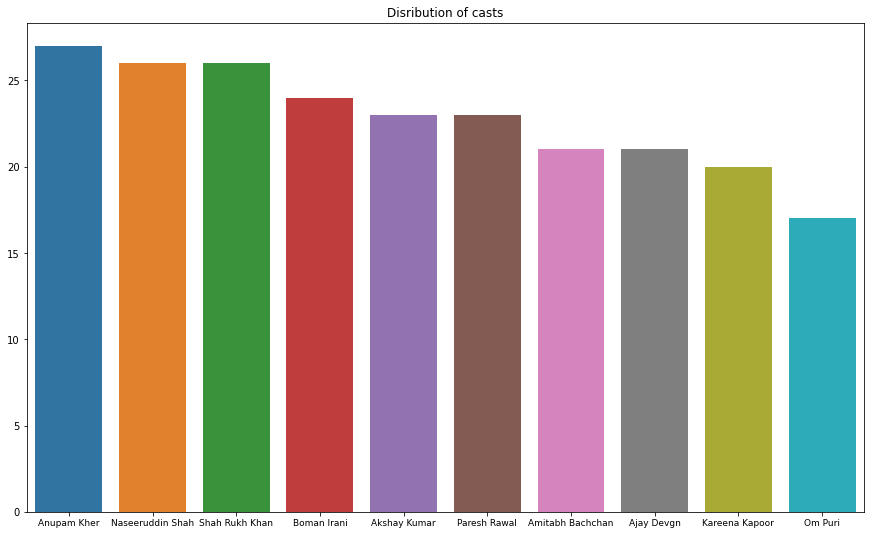

In [25]:
plot_bar_plot(cast_df, 'casts', 'counts', p_x=9)

Most common casts are Anupam Kher, Naseeruddin Shah, Shah Rukh Khan

In [26]:
ak_index = []

for index in df.index:
    if "Anupam Kher" in df.iloc[index]['cast']:
        ak_index.append(index)
        
ns_index = []
for index in df.index:
    if "Naseeruddin Shah" in df.iloc[index]['cast']:
        ns_index.append(index)
        
sk_index = []
for index in df.index:
    if "Shah Rukh Khan" in df.iloc[index]['cast']:
        sk_index.append(index)

In [27]:
ak_df = df.iloc[ak_index][['title', 'weighted_average_vote']].sort_values('weighted_average_vote', ascending=False)[:10]
ns_df = df.iloc[ns_index][['title', 'weighted_average_vote']].sort_values('weighted_average_vote', ascending=False)[:10]
sk_df = df.iloc[sk_index][['title', 'weighted_average_vote']].sort_values('weighted_average_vote', ascending=False)[:10]

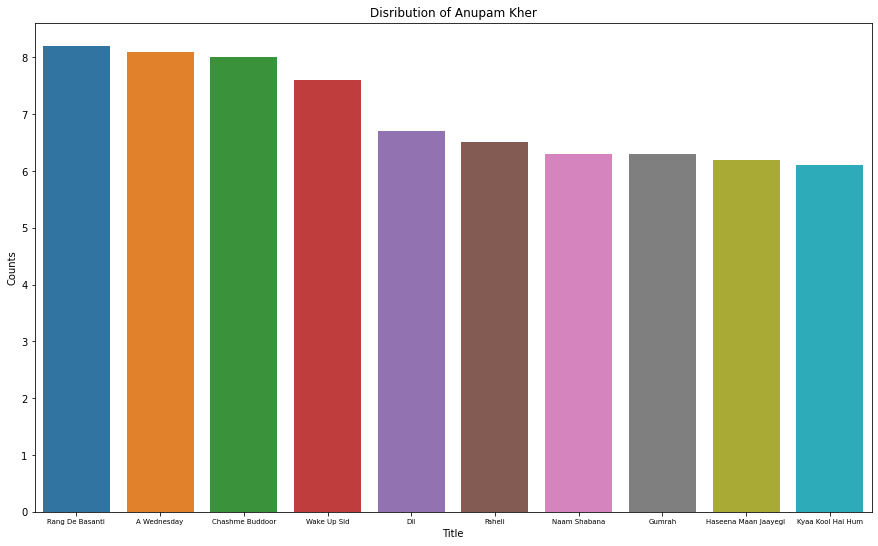

In [28]:
plot_bar_plot(ak_df, 'title', 'weighted_average_vote', p_x=7, x_lbl="Title", y_lbl='Counts', title='Anupam Kher')

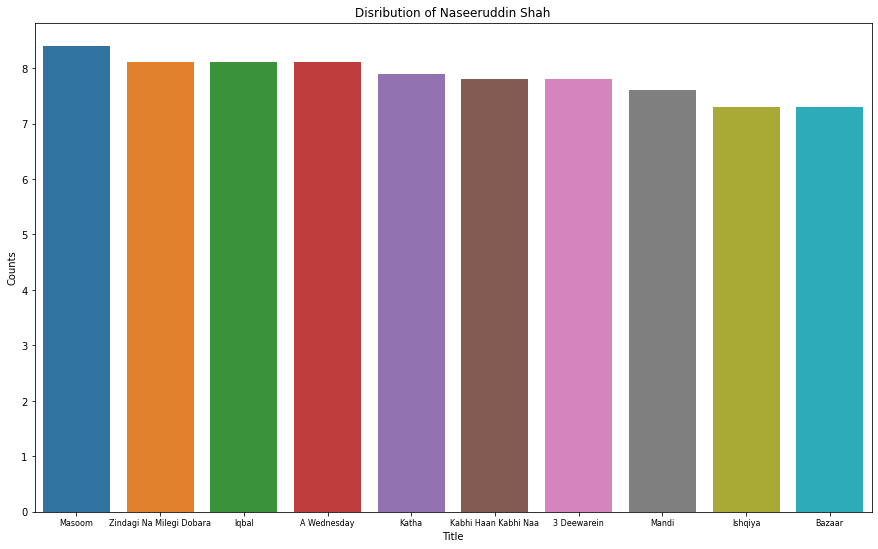

In [29]:
plot_bar_plot(ns_df, 'title', 'weighted_average_vote', p_x=8, x_lbl="Title", y_lbl='Counts', title='Naseeruddin Shah')

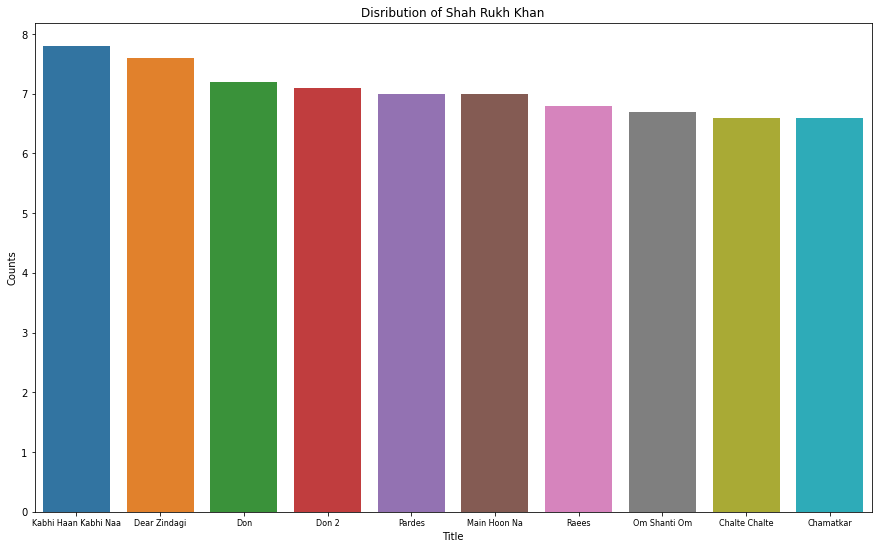

In [30]:
plot_bar_plot(sk_df, 'title', 'weighted_average_vote', p_x=8, x_lbl="Title", y_lbl='Counts', title='Shah Rukh Khan')

## Plotting base on rating

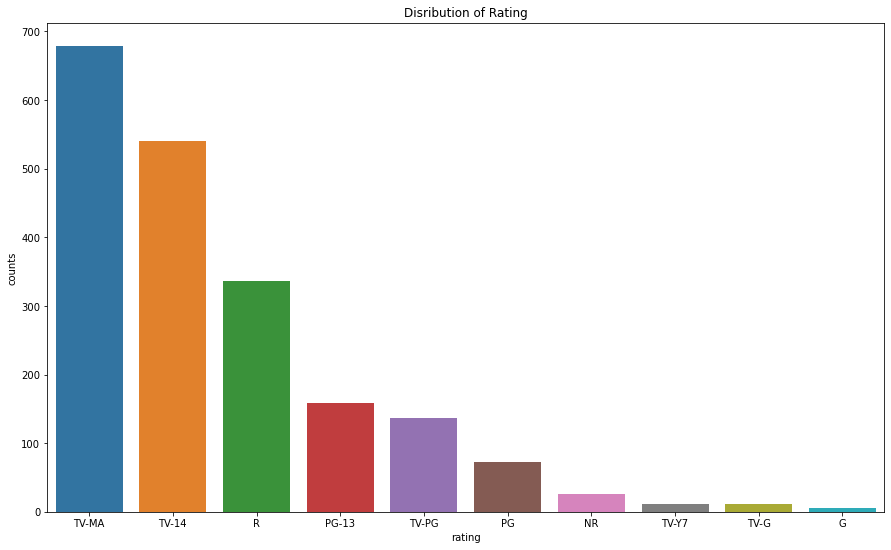

In [31]:
rating_title = df['rating'].value_counts().index[:10]
rating_counts = df['rating'].value_counts()[:10]

plot_bar_plot(df, rating_title, rating_counts, title='Rating', x_lbl='rating', y_lbl="counts")

Most common ratings are TV-MA, TV-14, R

In [32]:
ma_title = df[df['rating'] == 'TV-MA']['title']
ma_wav = df[df['rating'] == 'TV-MA']['weighted_average_vote']
ma_df = pd.DataFrame(data={'title':ma_title,
                           'weighted_average_vote':ma_wav}).sort_values('weighted_average_vote', ascending=False)[:10]

l4_title = df[df['rating'] == 'TV-14']['title']
l4_wav = df[df['rating'] == 'TV-14']['weighted_average_vote']
l4_df = pd.DataFrame(data={'title':l4_title,
                           'weighted_average_vote':l4_wav}).sort_values('weighted_average_vote', ascending=False)[:10]

r_title = df[df['rating'] == 'R']['title']
r_wav = df[df['rating'] == 'R']['weighted_average_vote']
r_df = pd.DataFrame(data={'title':r_title,
                           'weighted_average_vote':r_wav}).sort_values('weighted_average_vote', ascending=False)[:10]

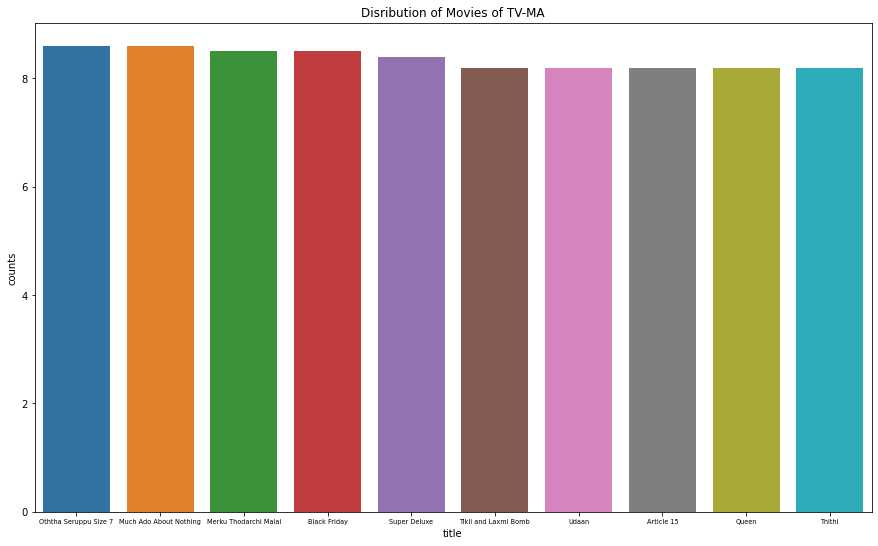

In [33]:
plot_bar_plot(ma_df, 'title', 'weighted_average_vote', title='Movies of TV-MA', x_lbl='title', y_lbl='counts', p_x=6.5)

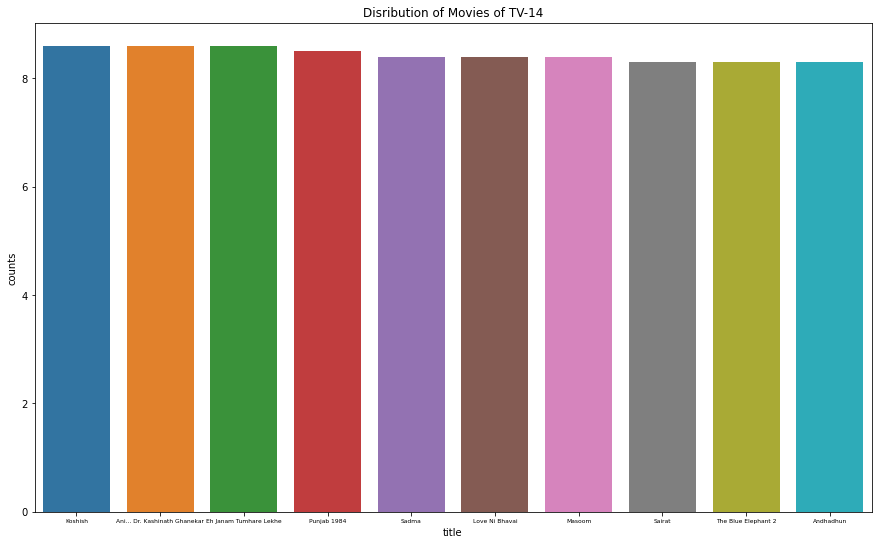

In [34]:
plot_bar_plot(l4_df, 'title', 'weighted_average_vote', title='Movies of TV-14', x_lbl='title', y_lbl='counts', p_x=6)

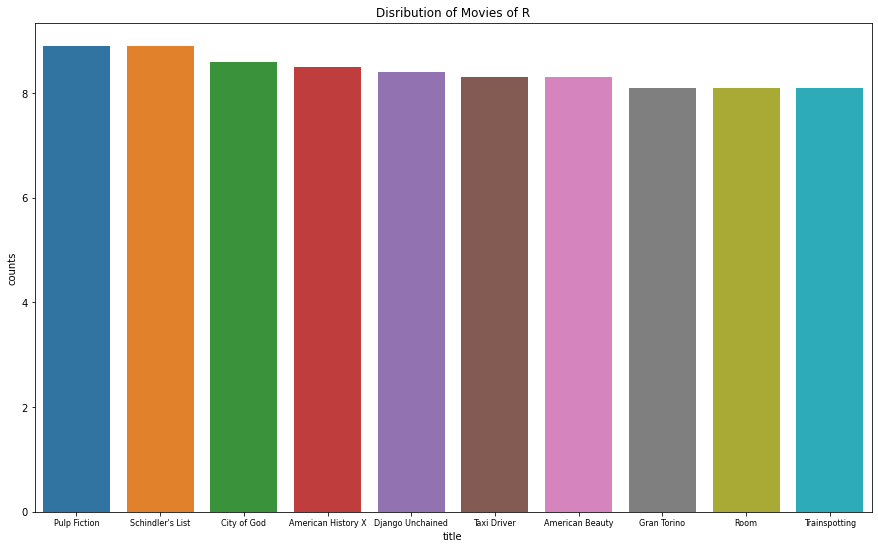

In [35]:
plot_bar_plot(r_df, 'title', 'weighted_average_vote', title='Movies of R', x_lbl='title', y_lbl='counts', p_x=8)

## Plotting base on Release Year

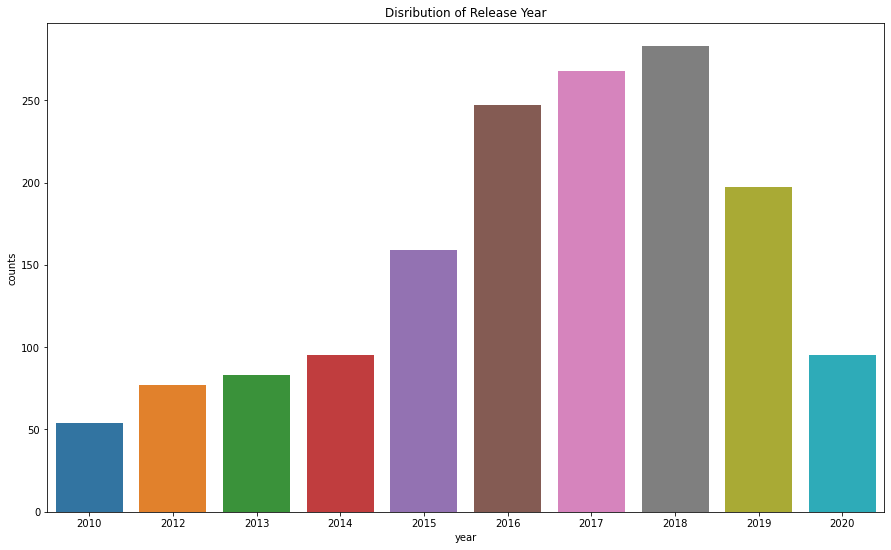

In [36]:
years = df['release_year'].value_counts().index[:10]
counts = df['release_year'].value_counts()[:10]

plot_bar_plot(df, years, counts, x_lbl='year', y_lbl='counts', title="Release Year")

Most common movies come out are 2018, 2017, 2016

In [37]:
z018_title = df[df['release_year'] == 2018]['title']
z018_wav = df[df['release_year'] == 2018]['weighted_average_vote']
z018_df = pd.DataFrame(data={'title':z018_title,
                             'weighted_average_vote':z018_wav}).sort_values('weighted_average_vote', ascending=False)[:10]

z017_title = df[df['release_year'] == 2017]['title']
z017_wav = df[df['release_year'] == 2017]['weighted_average_vote']
z017_df = pd.DataFrame(data={'title':z017_title,
                             'weighted_average_vote':z017_wav}).sort_values('weighted_average_vote', ascending=False)[:10]

z016_title = df[df['release_year'] == 2016]['title']
z016_wav = df[df['release_year'] == 2016]['weighted_average_vote']
z016_df = pd.DataFrame(data={'title':z016_title,
                             'weighted_average_vote':z016_wav}).sort_values('weighted_average_vote', ascending=False)[:10]

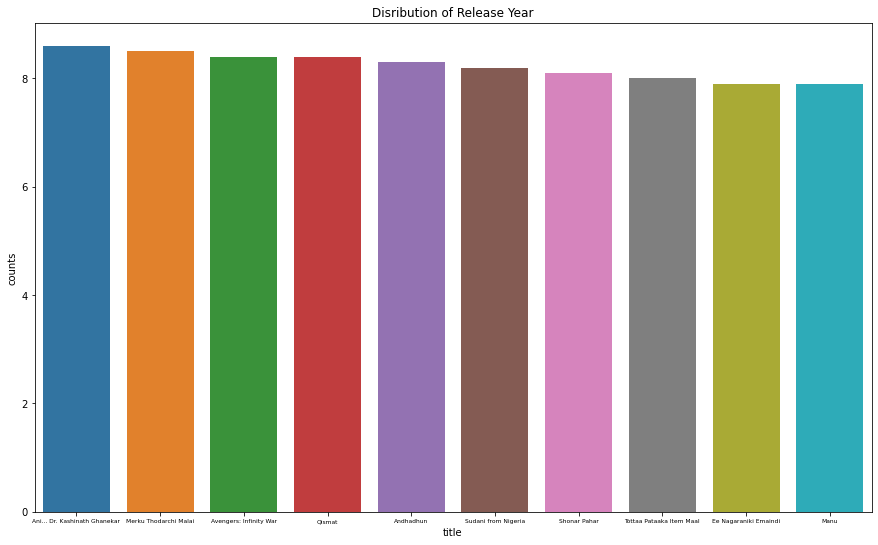

In [38]:
plot_bar_plot(z018_df, 'title', 'weighted_average_vote', x_lbl='title', y_lbl='counts', title='Release Year', p_x=6)

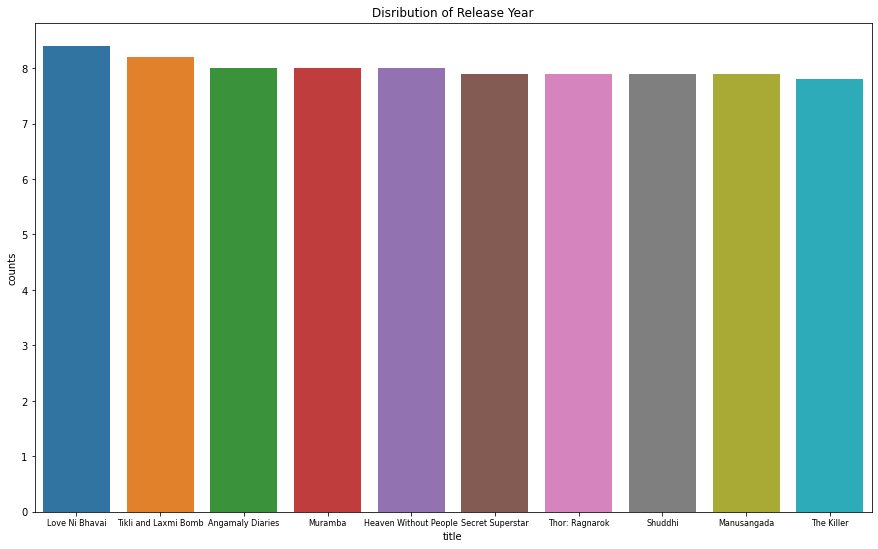

In [39]:
plot_bar_plot(z017_df, 'title', 'weighted_average_vote', x_lbl='title', y_lbl='counts', title='Release Year', p_x=8)

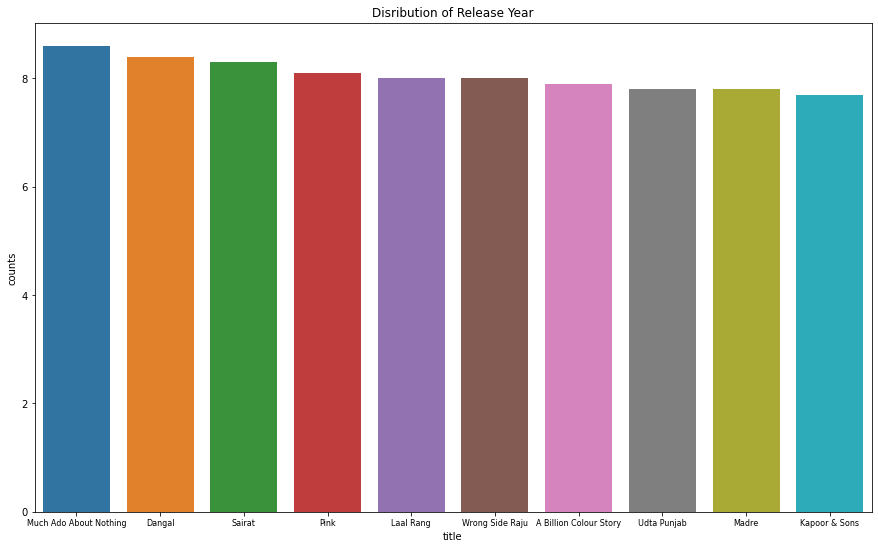

In [40]:
plot_bar_plot(z016_df, 'title', 'weighted_average_vote', x_lbl='title', y_lbl='counts', title='Release Year', p_x=8)

## Plotting base on listed_in

In [41]:
genres = []

for genre in df['listed_in']:
    genres.extend(genre.split(","))

genres = pd.Series(genres).apply(lambda x: x.strip())
genres = list(genres)

In [42]:
listed_in, counts = np.unique(genres, return_counts=True)

genre_counts = pd.DataFrame(data={'listed_in':listed_in,
                                  'counts':counts}).sort_values('counts', ascending=False)[:10]

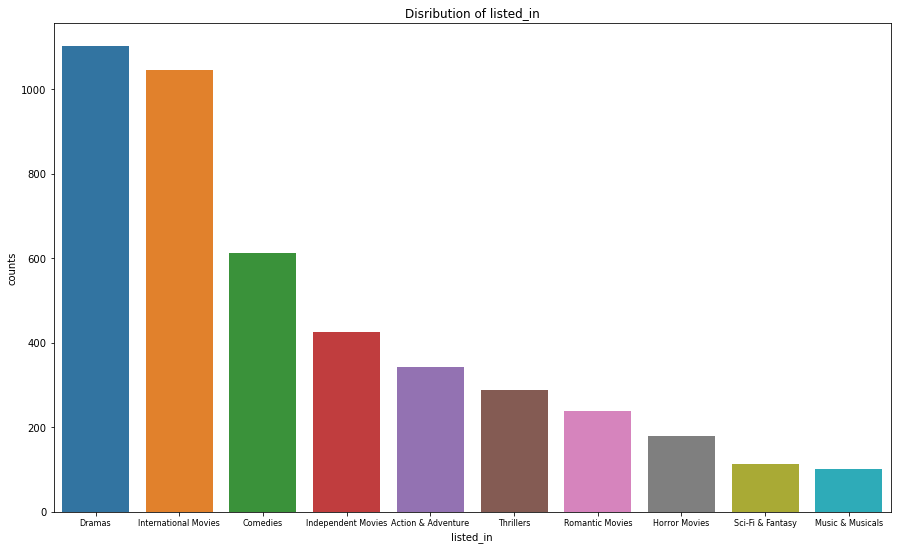

In [43]:
plot_bar_plot(genre_counts, 'listed_in', 'counts', x_lbl='listed_in', y_lbl='counts', p_x=8)

Most common listed_in are Dramas, International Movies, Comedies

In [44]:
d_index = []
for index in df.index:
    if 'Dramas' in df.iloc[index]['listed_in']:
        d_index.append(index)
        
im_index = []
for index in df.index:
    if 'International Movies' in df.iloc[index]['listed_in']:
        im_index.append(index)
        
c_index = []
for index in df.index:
    if 'Comedies' in df.iloc[index]['listed_in']:
        c_index.append(index)

In [45]:
d_df = df.iloc[d_index][["title", "weighted_average_vote"]]
im_df = df.iloc[im_index][["title", "weighted_average_vote"]]
c_df = df.iloc[c_index][["title", "weighted_average_vote"]]

d_df = d_df.sort_values('weighted_average_vote', ascending=False)[:10]
im_df = im_df.sort_values('weighted_average_vote', ascending=False)[:10]
c_df = c_df.sort_values('weighted_average_vote', ascending=False)[:10]

In [46]:
c_df['title']

633                Gol Maal
823                   Joker
1552           Super Deluxe
962          Love Ni Bhavai
20                 3 Idiots
371           Chupke Chupke
131               Andhadhun
706              Hera Pheri
1546    Sudani from Nigeria
130         Andaz Apna Apna
Name: title, dtype: object

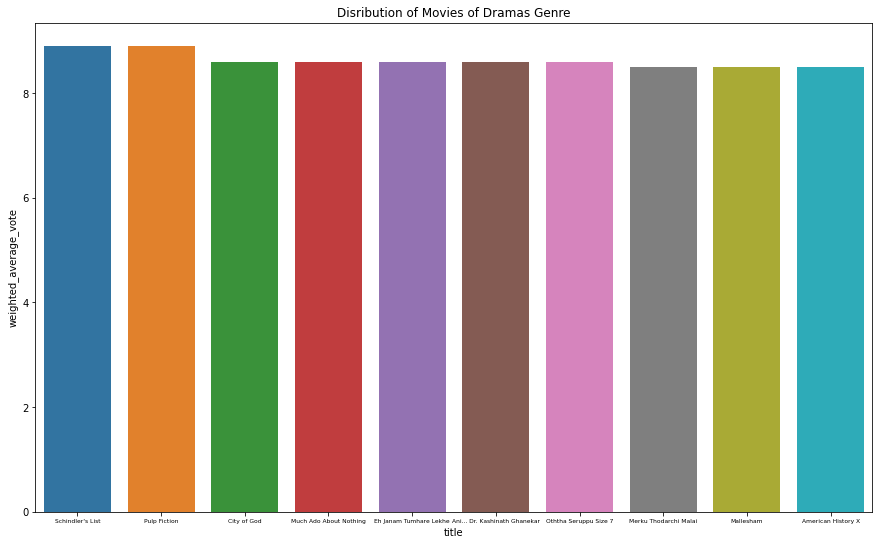

In [47]:
plot_bar_plot(d_df, 'title', 'weighted_average_vote', p_x=6, title='Movies of Dramas Genre', 
              x_lbl='title', y_lbl='weighted_average_vote')

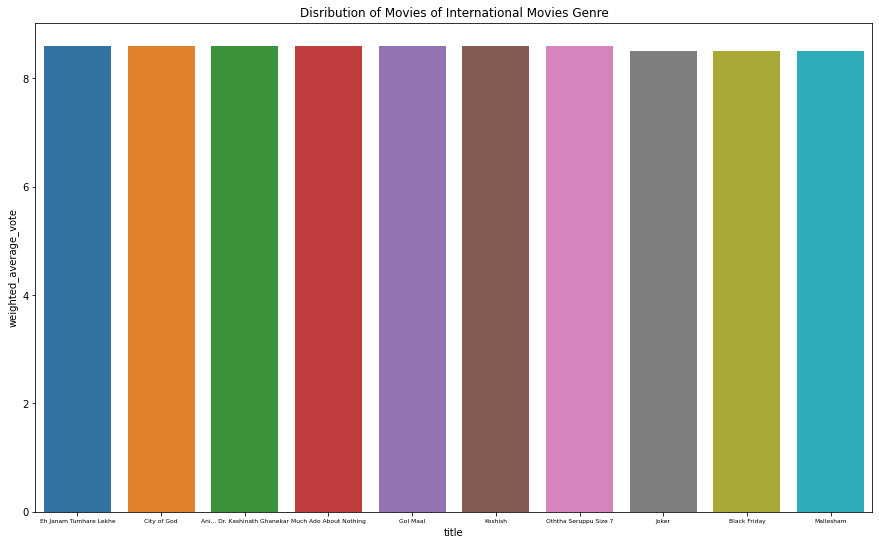

In [48]:
plot_bar_plot(im_df, 'title', 'weighted_average_vote', p_x=6, title='Movies of International Movies Genre', 
              x_lbl='title', y_lbl='weighted_average_vote')

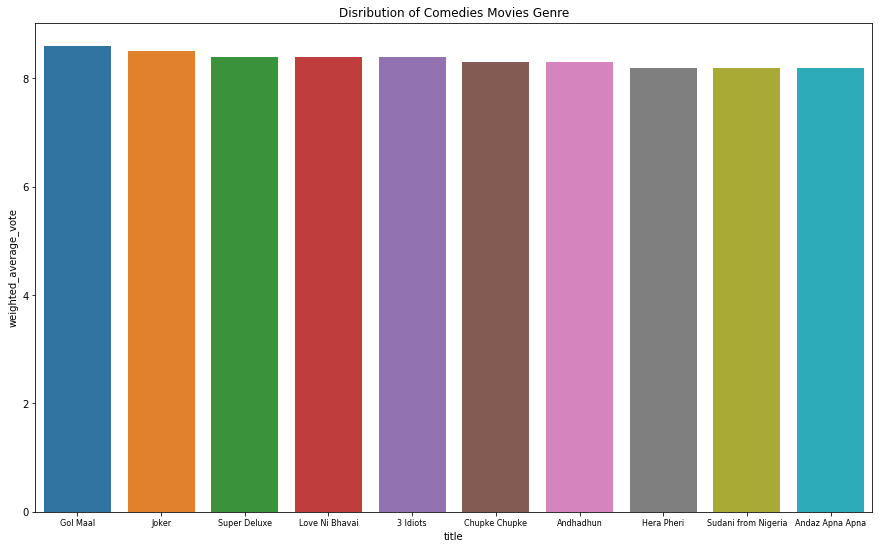

In [49]:
plot_bar_plot(c_df, 'title', 'weighted_average_vote', p_x=8, title='Comedies Movies Genre', 
              x_lbl='title', y_lbl='weighted_average_vote')

## Relationship between total votes and weighted_average_vote

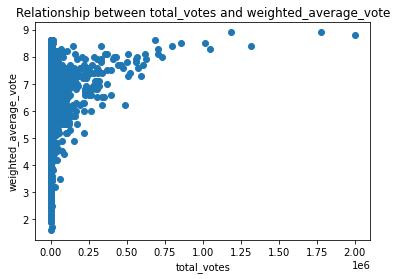

In [50]:
plt.scatter(df['total_votes'], df['weighted_average_vote'])
plt.title("Relationship between total_votes and weighted_average_vote")
plt.xlabel('total_votes')
plt.ylabel('weighted_average_vote')
plt.show()

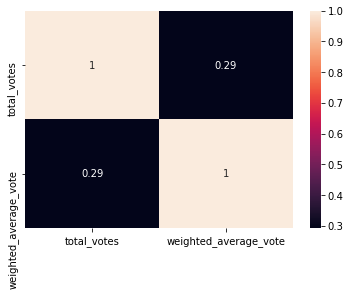

In [51]:
tw_df = df[['total_votes', 'weighted_average_vote']]

sns.heatmap(tw_df.corr(), annot=True)
plt.show()

# Conclusion

In this dataset there are a lot of movies that we can conclude:

## Movies with countries
In this dataset there are most common countries where the movies are made like United States, India, and United Kingdom

- The best rated movies that made in United States are Pulp Fiction, Schindler's List, Inception
- The best rated movies that made in India are Eh Janam Tumhare Lekhe, Koshish, Oththa Seruppu Size 7
- The best rated movies that made in United Kingdom are Inception, Trainspotting, Platoon

## Movies with directors
In this dataset there are most common directors that made the movie like Cathy Garcia-Molina, David Dhawan, and Rajkumar Santoshi

- The best rated movies that directed by Cathy Garcia-Molina are Seven Sundays, Four Sisters and a Wedding, The Hows of Us
- The best rated movies that directed by David Dhawan are Chashme Buddoor, Mujhse Shaadi Karogi, Haseena Maan Jaayegi
- The best rated movies that directed by Rajkumar Santoshi are Andaz Apna Apna, The Legend of Bhagat Singh, Ghayal

## Movies with casts or actors
In this dataset there are most common casts or actors that act in the movie like Anupam Kher, Naseeruddin Shah, and Shah Rukh Khan

- The best rated movies that acted by Anupam Kher are Rang De Basanti, A Wednesday, Chashme Buddoor
- The best rated movies that acted by Naseeruddin Shah are Masoom, Zindagi Na Milegi Dobara, Iqbal
- The best rated movies that acted by Shah Rukh Khan are Kabhi Haan Kabhi Naa, Dear Zindagi, Don

## Movies with rating tv
In this dataset there are most common rating tv like TV-MA, TV-14, and R

- The best rated movies with rating tv TV-MA are Oththa Seruppu Size 7, Much Ado About Nothing, Merku Thodarchi Malai
- The best rated movies with rating tv TV-14 are Koshish, Ani... Dr. Kashinath Ghanekar, Eh Janam Tumhare Lekhe
- The best rated movies with rating tv R are Pulp Fiction, Schindler's List, City of God

## Movies with release year
In this dataset there are most common years where the movies are release like 2018, 2017, and 2016

- The best rated movies with release year 2018 are Ani... Dr. Kashinath Ghanekar, Merku Thodarchi Malai, Avengers: Infinity War
- The best rated movies with release year 2017 are Love Ni Bhavai, Tikli and Laxmi Bomb, Angamaly Diaries
- The best rated movies with release year 2016 are Much Ado About Nothing, Dangal, Sairat

## Movies with listed in
In this dataset there are most common listed in or genre like Dramas, International Movies, and Comedies

- The best rated movies with dramas genre are Schindler's List, Pulp Fiction, City of God
- The best rated movies with international movies genre are Eh Janam Tumhare Lekhe, City of God, Ani... Dr. Kashinath Ghanekar
- The best rated movies with comedies are Gol Maal, Joker, Super Deluxe